# 信号处理仿真与应用 - 数字和模拟滤波器 - 数字滤波器设计

## rcosdesign

#### 升余弦滤波器设计

**计算平方根升余弦滤波器**

Maximum absolute difference between h_rrc and recomputed h_rrc: 0.0


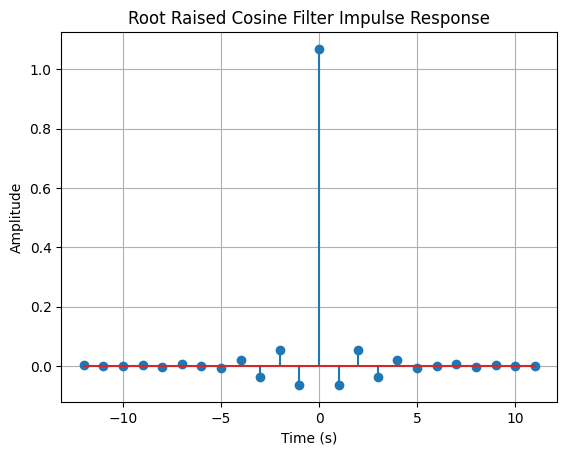

In [8]:
import numpy as np  
import matplotlib.pyplot as plt  
# 定义rrcosfilter函数（如果尚未定义）  
def rrcosfilter(N, alpha, Ts, Fs):
    """
    Generates a root raised cosine (RRC) filter (FIR) impulse response.
    Parameters
    ----------
    N : int
        Length of the filter in samples.

    alpha : float
        Roll off factor (Valid values are [0, 1]).

    Ts : float
        Symbol period in seconds.

    Fs : float
        Sampling Rate in Hz.

    Returns
    ---------
    time_idx : 1-D ndarray of floats
        Array containing the time indices, in seconds, for
        the impulse response.
    h_rrc : 1-D ndarray of floats
        Impulse response of the root raised cosine filter.
    """
    T_delta = 1/float(Fs)
    time_idx = ((np.arange(N)-N/2))*T_delta
    sample_num = np.arange(N)
    h_rrc = np.zeros(N, dtype=float)
    for x in sample_num:
        t = (x-N/2)*T_delta
        if t == 0.0:
            h_rrc[x] = 1.0 - alpha + (4*alpha/np.pi)
        elif alpha != 0 and t == Ts/(4*alpha):
            h_rrc[x] = (alpha/np.sqrt(2))*(((1+2/np.pi)* \
                    (np.sin(np.pi/(4*alpha)))) + ((1-2/np.pi)*(np.cos(np.pi/(4*alpha)))))
        elif alpha != 0 and t == -Ts/(4*alpha):
            h_rrc[x] = (alpha/np.sqrt(2))*(((1+2/np.pi)* \
                    (np.sin(np.pi/(4*alpha)))) + ((1-2/np.pi)*(np.cos(np.pi/(4*alpha)))))
        else:
            h_rrc[x] = (np.sin(np.pi*t*(1-alpha)/Ts) +  \
                    4*alpha*(t/Ts)*np.cos(np.pi*t*(1+alpha)/Ts))/ \
                    (np.pi*t*(1-(4*alpha*t/Ts)*(4*alpha*t/Ts))/Ts)
    return time_idx, h_rrc
# 参数设置，模仿MATLAB的rcosdesign函数  
beta = 0.25  # 滚降因子  
span = 6     # 滤波器跨度（在符号时间内的倍数）  
num_taps = 4 # 滤波器系数数量    
# 符号周期和采样率  
Ts = 1
Fs = 1.0 / Ts  
# 计算滤波器长度  
N = span * num_taps  
# 生成根升余弦滤波器的脉冲响应  
time_idx, h_rrc = rrcosfilter(N, beta, Ts, Fs)  
# 因为Python函数直接返回根升余弦滤波器，不需要像MATLAB那样指定"sqrt"  
# 所以我们直接比较h_rrc和重新计算的h_rrc_recomputed  
h_rrc_recomputed = rrcosfilter(N, beta, Ts, Fs)[1]  
# 计算最大绝对差异  
mx = np.max(np.abs(h_rrc - h_rrc_recomputed))  
print(f"Maximum absolute difference between h_rrc and recomputed h_rrc: {mx}")  
# 绘制滤波器的脉冲响应  
plt.stem(time_idx, h_rrc)  
plt.xlabel('Time (s)')  
plt.ylabel('Amplitude')  
plt.title('Root Raised Cosine Filter Impulse Response')  
plt.grid(True) 
plt.show()

**计算升余弦和平方根升余弦滤波器的脉冲响应**

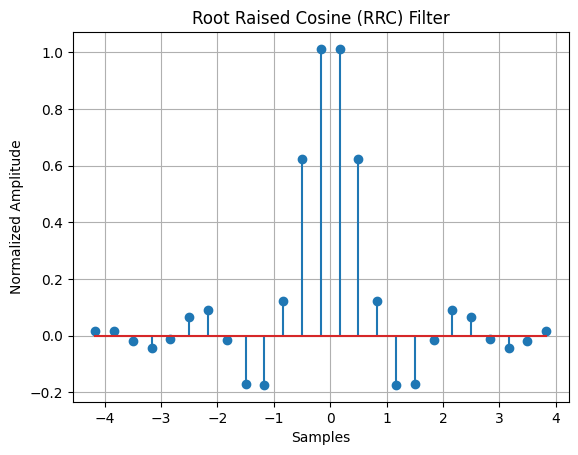

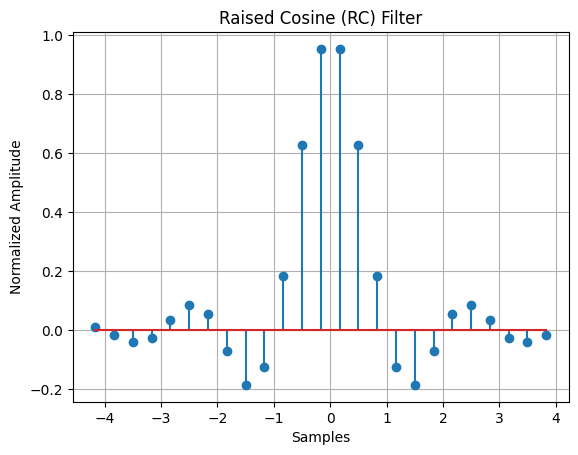

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from commpy.filters import rcosfilter, rrcosfilter

# Parameters
rf = 0.25
span = 4
sps = 3

# Generating Root Raised Cosine (RRC) filter
N = span * sps * 2 + 1  # Filter length
alpha = rf
Ts = 1.0  # Symbol period in seconds
Fs = sps  # Sampling rate in Hz

time_idx_rrc, h_rrc = rrcosfilter(N, alpha, Ts, Fs)

# Generating Raised Cosine (RC) filter
time_idx_rc, h_rc = rcosfilter(N, alpha, Ts, Fs)

# Plotting impulse responses
plt.figure()
plt.stem(time_idx_rrc, h_rrc)
plt.xlabel("Samples")
plt.ylabel("Normalized Amplitude")
plt.title("Root Raised Cosine (RRC) Filter")
plt.grid(True)
plt.show()

plt.figure()
plt.stem(time_idx_rc, h_rc)
plt.xlabel("Samples")
plt.ylabel("Normalized Amplitude")
plt.title("Raised Cosine (RC) Filter")
plt.grid(True)
plt.show()

**通过升余弦滤波器传递信号**

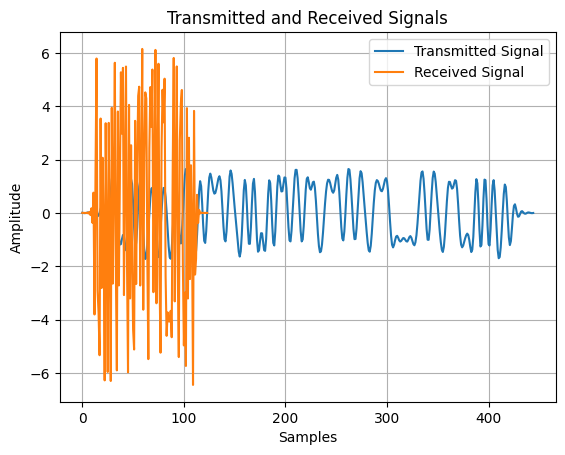

In [15]:
import numpy as np
from commpy.filters import rcosfilter, rrcosfilter
from scipy.signal import upfirdn
import matplotlib.pyplot as plt

# Parameters
rolloff = 0.25
span = 6
sps = 4

# Generate Root Raised Cosine (RRC) filter coefficients
N_rrc = span * sps * 2 + 1
alpha = rolloff
Ts = 1.0
Fs = sps
_, h_rrc = rrcosfilter(N_rrc, alpha, Ts, Fs)

# Generate Raised Cosine (RC) filter coefficients
N_rc = span * sps * 2 + 1
_, h_rc = rcosfilter(N_rc, alpha, Ts, Fs)

# Generate random data
d = 2*np.random.randint(0, 2, 100) - 1

# Upsample and filter data using RRC filter
x = upfirdn(h_rrc, d, sps)

# Add noise
r = x + np.random.normal(0, 0.01, len(x))

# Filter received signal using RRC filter
y = upfirdn(h_rrc, r, 1, sps)

# Plot original and received signals
plt.figure()
plt.plot(x, label='Transmitted Signal')
plt.plot(y, label='Received Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Transmitted and Received Signals')
plt.legend()
plt.grid(True)
plt.show()